In [1]:
# importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
sns.set()
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
df= pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Early Data Analysis 

In [7]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df.isnull().sum() #shows if there is any missing

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [10]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.tail() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [13]:
#showing the descriptive statistics 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Preprocessing of the Data

In [14]:
df["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [15]:
df["race/ethnicity"].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [16]:
df["parental level of education"].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [17]:
df["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [18]:
df["test preparation course"].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [19]:
df["test preparation course"].replace(to_replace="none", value=np.nan, inplace=True)
df["test preparation course"].fillna(value="not completed", inplace=True)


In [20]:
df.loc[df["test preparation course"].isna(), "test preparation course"] = "not completed"


In [21]:
le = LabelEncoder()
df["gender"]= le.fit_transform(df["gender"])
df["race/ethnicity"] = le.fit_transform(df["race/ethnicity"])
df["parental level of education"]= le.fit_transform(df["parental level of education"])
df["lunch"] = le.fit_transform(df["lunch"])
df["test preparation course"]= le.fit_transform(df["test preparation course"])

Text(0, 0.5, 'Count')

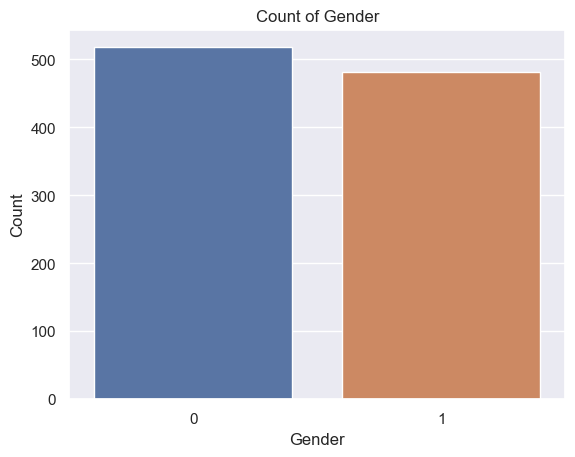

In [22]:
sns.countplot(data=df, x="gender")
plt.title("Count of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

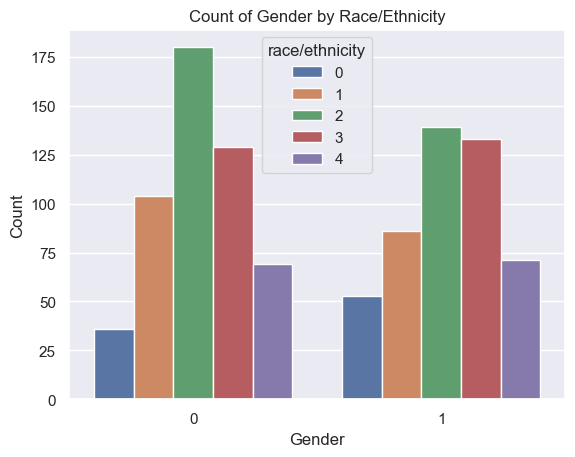

In [23]:
sns.countplot(data=df, x="gender", hue="race/ethnicity")
plt.title('Count of Gender by Race/Ethnicity')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

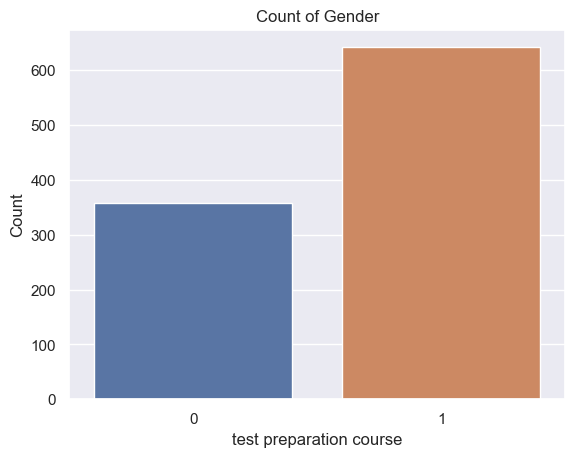

In [24]:
sns.countplot(data=df, x="test preparation course")
plt.title("Count of Gender")
plt.xlabel("test preparation course")
plt.ylabel("Count")

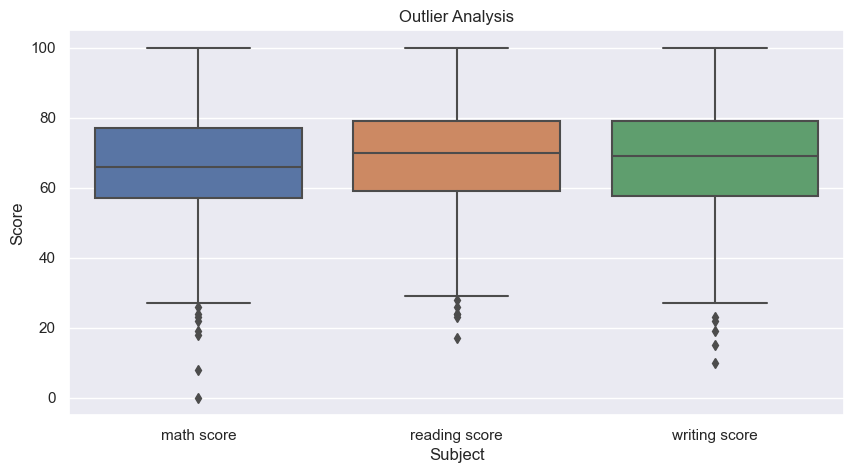

In [25]:
# Outlier Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title('Outlier Analysis')
plt.xlabel('Subject')
plt.ylabel('Score')
plt.show()

In [26]:
gender_counts = df['gender'].value_counts()

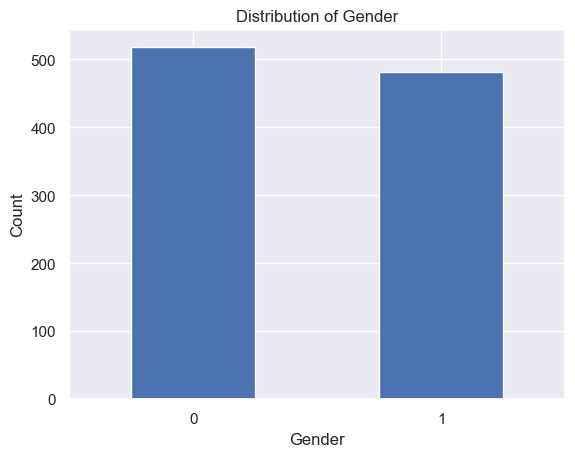

In [27]:
# matplotlib plot for showing seaborn distribution 
gender_counts.plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

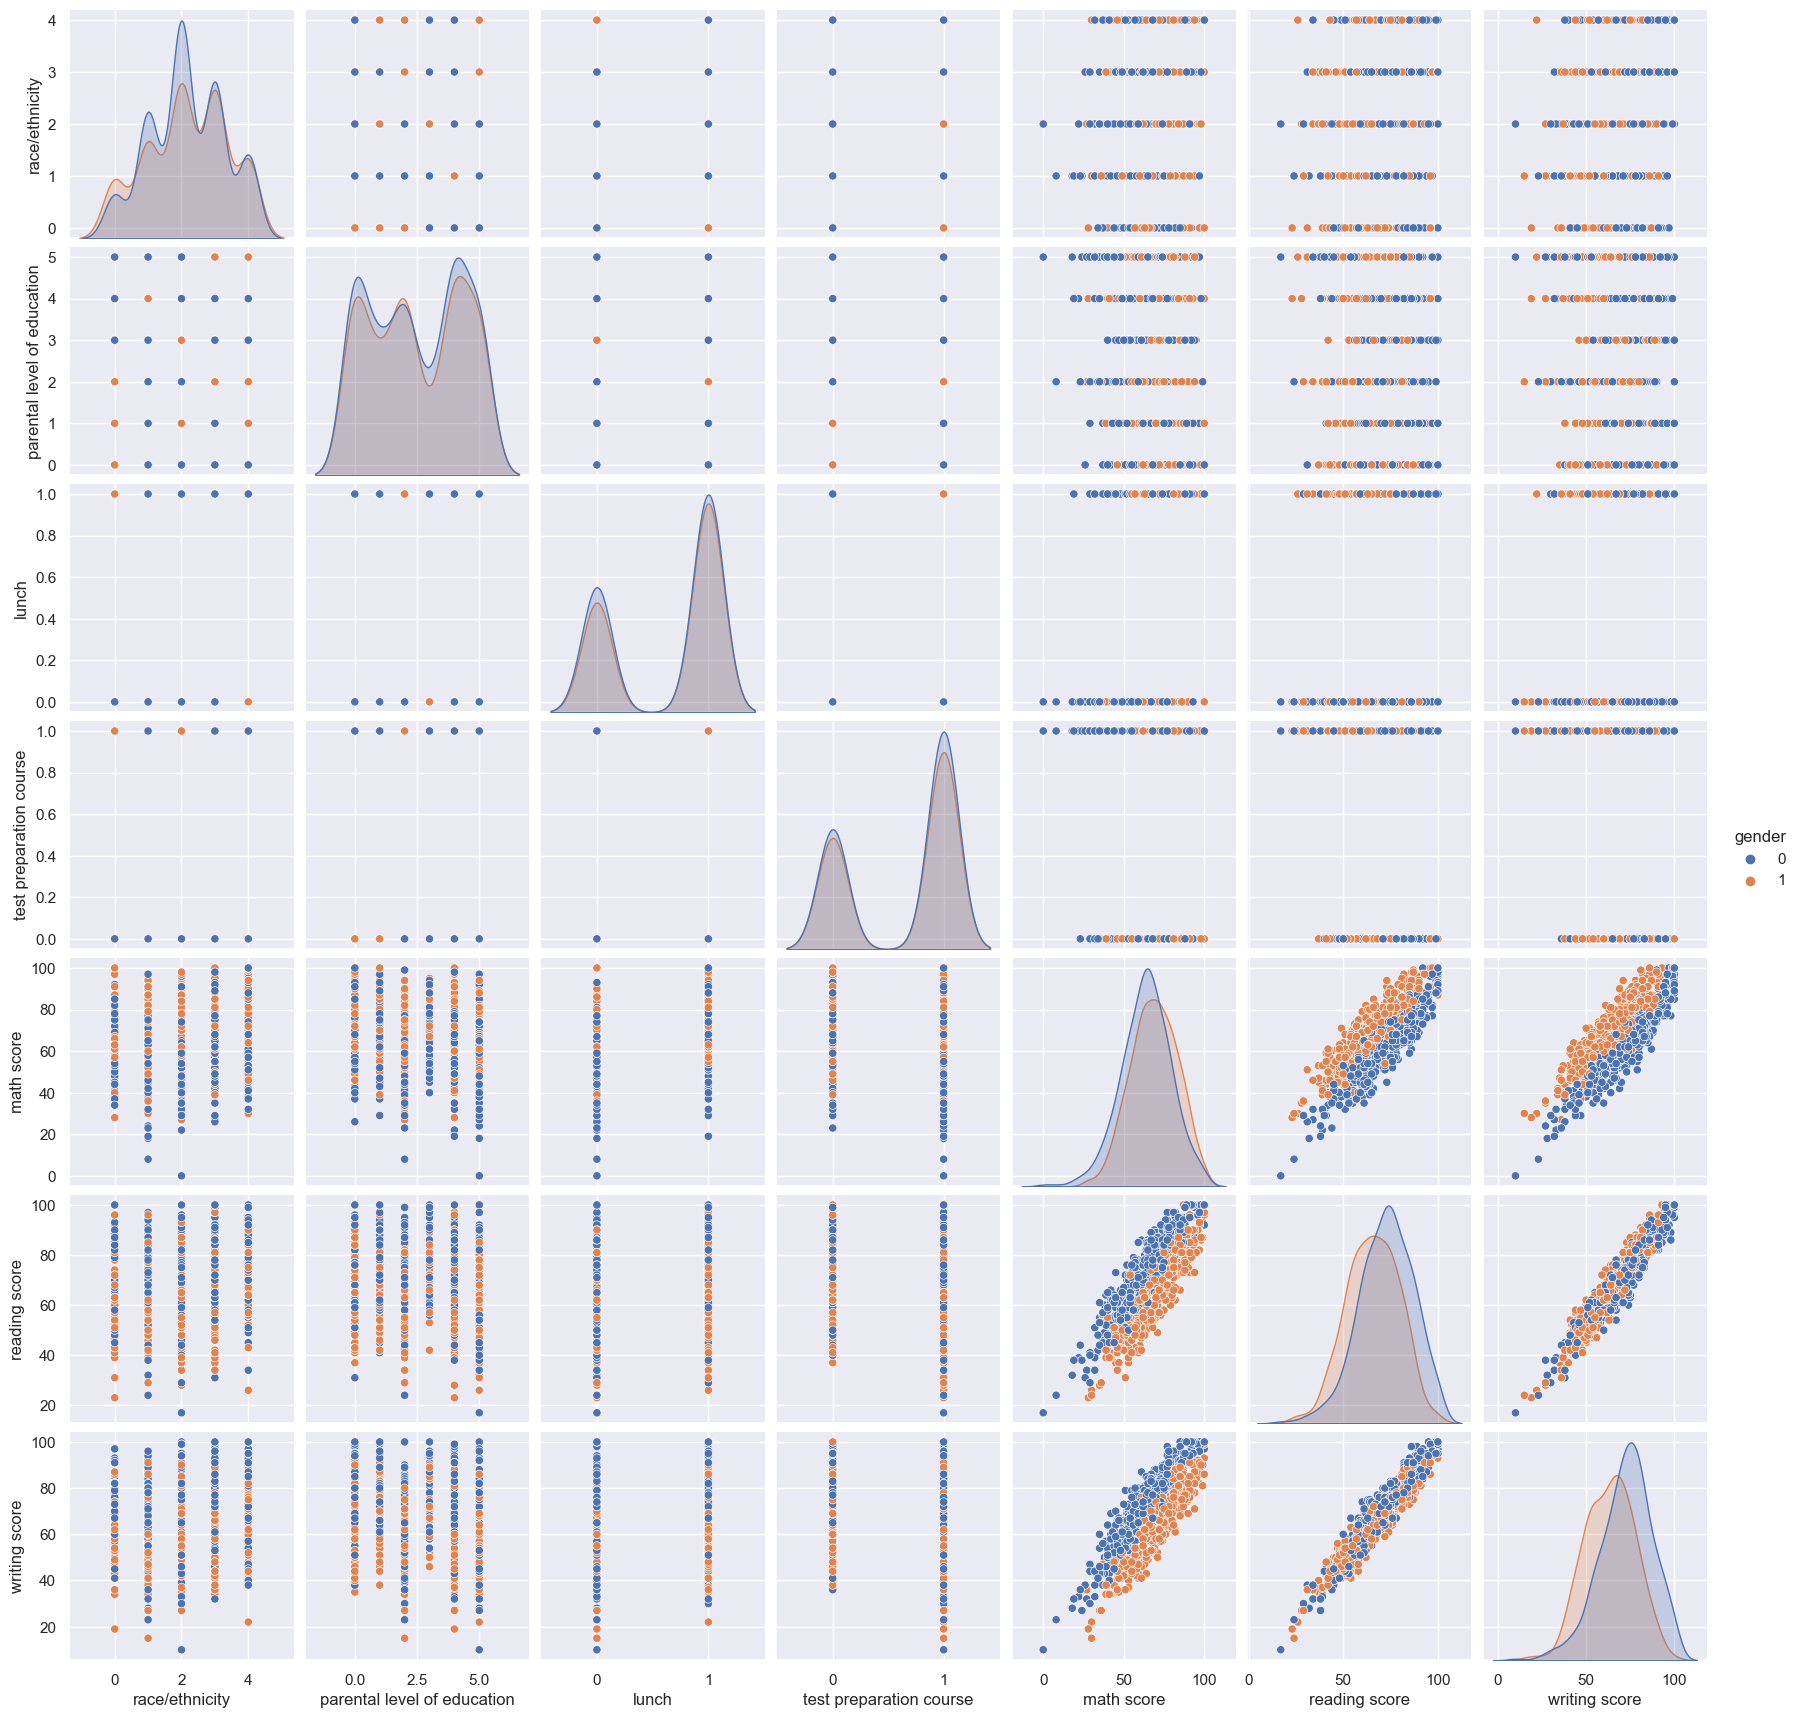

In [28]:
sns.pairplot(data=df, hue="gender")
plt.show()

In [29]:
x = df.iloc[:,[5, 6,]].values
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [30]:
# import KMeans library for clustering
from sklearn.cluster import KMeans

# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, max_iter = 300, n_init = 10, random_state = 0)

# n_initint, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x)

print(y_kmeans)

[3 3 1 2 3 3 1 2 0 2 0 2 3 3 2 3 1 2 2 0 3 3 2 3 3 3 0 3 3 3 3 0 0 2 1 1 3
 0 1 0 0 3 0 0 0 0 0 3 3 1 0 3 2 1 3 2 1 0 0 2 3 2 0 3 0 0 2 3 0 2 0 0 2 0
 2 2 2 1 3 0 2 2 2 3 2 3 1 3 0 1 3 2 3 2 1 1 0 3 0 3 3 3 1 0 1 0 1 0 0 3 1
 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 3 3 1 2 1 2 1 3 3 0 0 0 0 0 3 0 2 2 1 2 1 3
 3 1 0 3 0 2 0 3 3 0 3 0 1 1 2 0 1 1 0 3 3 3 3 1 1 0 2 1 2 3 0 1 0 0 2 3 2
 3 3 0 2 1 0 1 0 3 3 0 0 0 2 3 3 3 3 0 2 3 3 1 3 0 1 2 2 0 1 1 1 2 3 0 0 1
 0 1 0 2 3 0 3 1 3 2 3 1 1 3 0 0 0 1 3 1 0 0 3 1 1 0 0 0 2 3 0 1 0 3 3 3 3
 3 3 1 2 1 3 2 3 3 1 3 0 0 2 3 1 1 1 0 3 0 0 2 3 3 2 1 1 3 1 3 3 1 0 3 3 0
 2 3 2 1 1 0 3 3 3 3 1 2 0 0 3 0 0 3 0 3 1 3 3 0 3 1 3 2 2 1 0 2 3 2 0 2 0
 1 1 0 3 2 2 2 0 3 3 3 3 3 0 1 3 1 0 0 3 2 0 3 0 0 0 1 0 1 0 2 0 0 0 0 0 3
 1 0 3 1 0 2 1 1 3 0 1 1 1 2 2 3 3 3 0 3 3 3 3 0 3 2 0 1 3 0 0 2 0 1 0 3 0
 1 0 1 3 1 3 0 0 1 3 3 0 0 1 0 0 3 2 0 1 3 0 0 0 3 0 0 3 2 3 3 0 1 3 1 3 3
 1 3 3 1 2 3 3 1 3 0 0 2 1 0 1 3 0 0 3 1 3 1 2 3 1 1 1 3 3 0 1 3 3 3 0 3 3
 0 3 0 2 3 0 3 0 1 3 0 1 

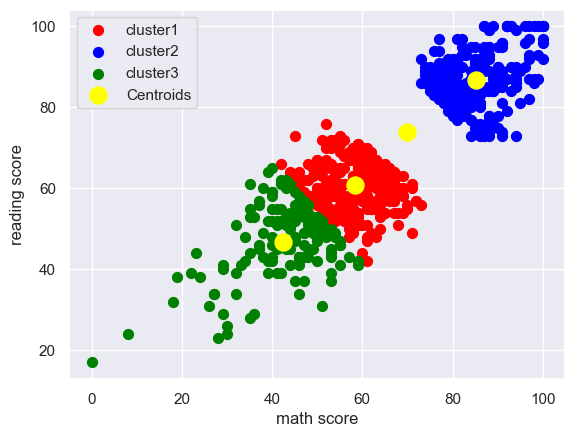

In [31]:
# Visualising the clusters using scatter() method
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=50, c='red', label='cluster1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=50, c='blue', label='cluster2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=50, c='green', label='cluster3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('math score')
plt.ylabel('reading score')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best") 

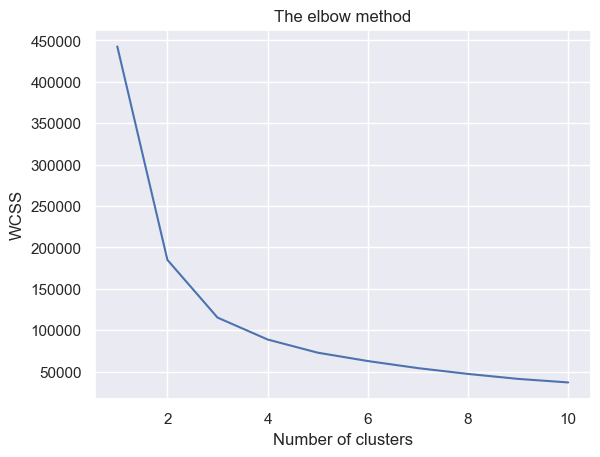

In [32]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)  # Initialise an object kmeans by calling 
                                                                                    # an object KMeans()
    kmeans.fit(x)                                                                   # Training the model by calling fit() method
    wcss.append(kmeans.inertia_)                                                    # Store kmeans.inertia_ in the array wcss
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

In [33]:
# import silhouette score from sklearn library
from sklearn.metrics import silhouette_score

# Display the silhouette score values
print(f'Silhouette Score(n = 3): {silhouette_score(x, y_kmeans)}')

Silhouette Score(n = 3): 0.3658731638172302


## KMedoid Clustering

In [34]:
y=df['gender'] #independent variables
#dependent variables
X = df[['math score', 'reading score', 'writing score']]
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


Text(0, 0.5, 'writing score')

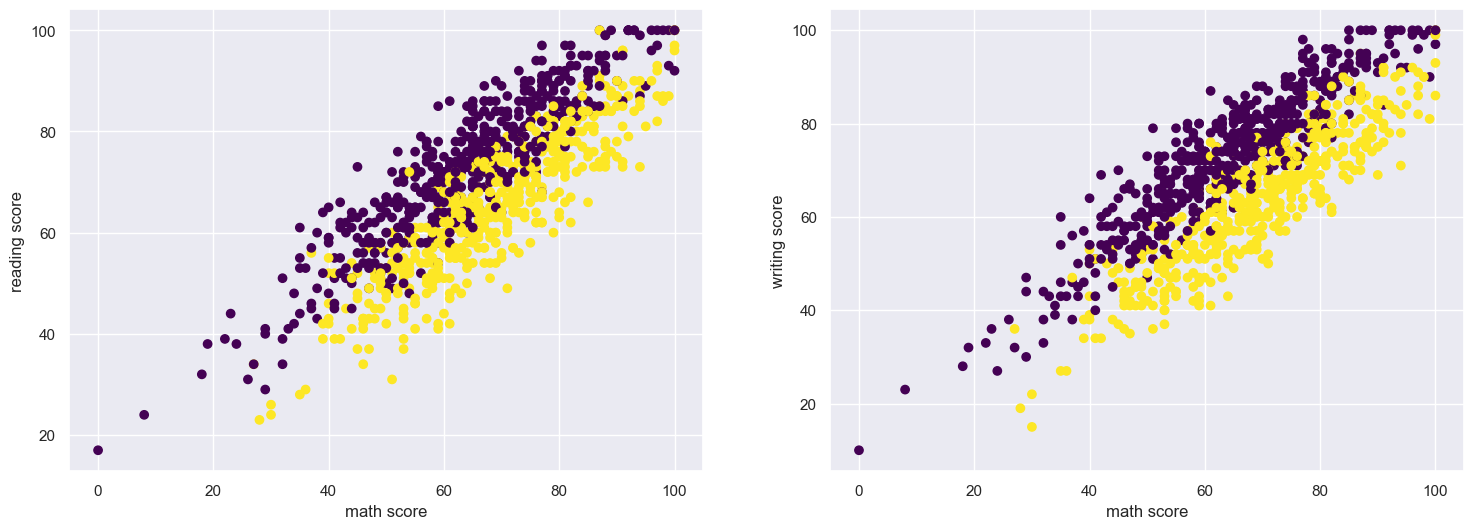

In [35]:
import matplotlib.pyplot as plt

# Assuming df is defined somewhere in your code

# to show the independent variable 
y = df['gender']
x = df.iloc[:, [5, 6, 7]].values
# Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

# Scatter plot for 'math score' against 'reading score'
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
axes[0].set_xlabel('math score')
axes[0].set_ylabel('reading score')

# Scatter plot for 'math score' against 'writing score'
axes[1].scatter(x[:, 0], x[:, 2], c=y, cmap='viridis')
axes[1].set_xlabel('math score')
axes[1].set_ylabel('writing score')



In [36]:
#Install the scikit-learn-extra library before the execution of next cell
!pip install scikit-learn-extra

In [37]:
y=df['gender'] #independent variables
#dependent variables
X = df[['reading score','writing score']]
X.head()

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75


In [38]:
from sklearn_extra.cluster import KMedoids

# Store 'reading score' and 'writing score' columns from X

D = X[['reading score', 'writing score']]

# Initialise the number of clusters
cluster_num = 3

# Initialize the KMedoids model
model = KMedoids(n_clusters=3, random_state=0)

# Fit the model to the data
model.fit(D)

# Display the cluster centers
centers = model.cluster_centers_
print("Cluster centers:\n", centers)

Cluster centers:
 [[54. 52.]
 [70. 69.]
 [85. 84.]]


In [39]:
# Display the attributes Petal length and Petal width
print(D)

     reading score  writing score
0               72             74
1               90             88
2               95             93
3               57             44
4               78             75
..             ...            ...
995             99             95
996             55             55
997             71             65
998             78             77
999             86             86

[1000 rows x 2 columns]


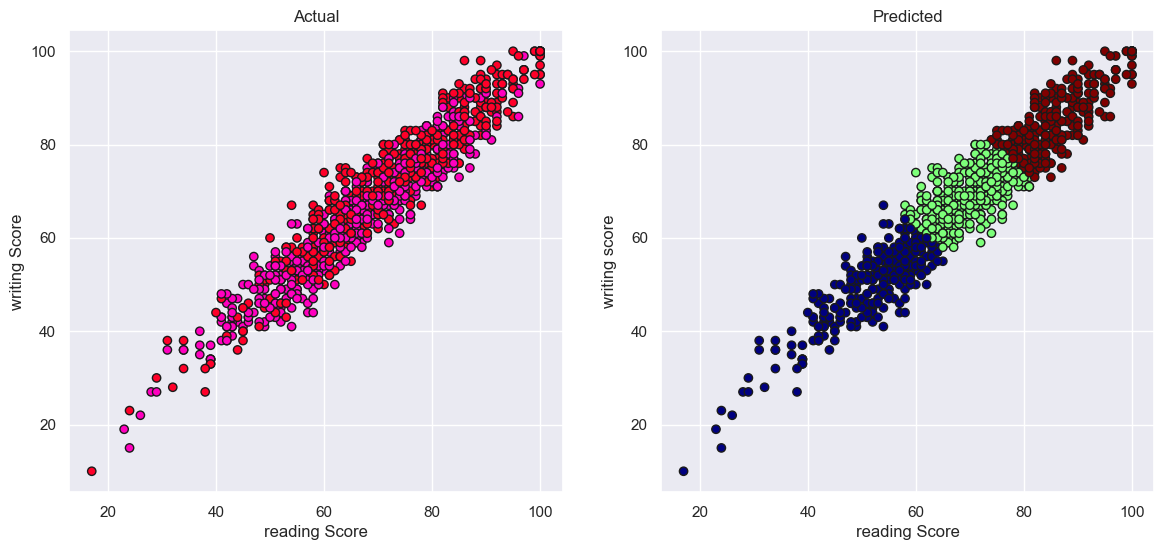

In [40]:
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids  # Assuming you're using sklearn-extra library
import numpy as np

# Assuming D, X, and y are defined somewhere in your code
D = X[['reading score', 'writing score']].values  # Extract values from DataFrame

# make new labels using K-medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=0)  # Change the number of clusters as needed
new_labels = kmedoids.fit_predict(D)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow', edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet', edgecolor='k')
axes[0].set_xlabel('reading Score')
axes[0].set_ylabel('writing Score')
axes[1].set_xlabel('reading Score')
axes[1].set_ylabel('writing score')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')
plt.show()

In [41]:
X = df.iloc[:, [5, 6,7]].values

# Display first 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [42]:
print(X)

[[72 72 74]
 [69 90 88]
 [90 95 93]
 ...
 [59 71 65]
 [68 78 77]
 [77 86 86]]


In [43]:
X = df.iloc[:, [5, 6,7]].values  # race/ ethnicity parental level of education 

# Display first 5 records
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77
999,0,3,4,0,1,77,86,86


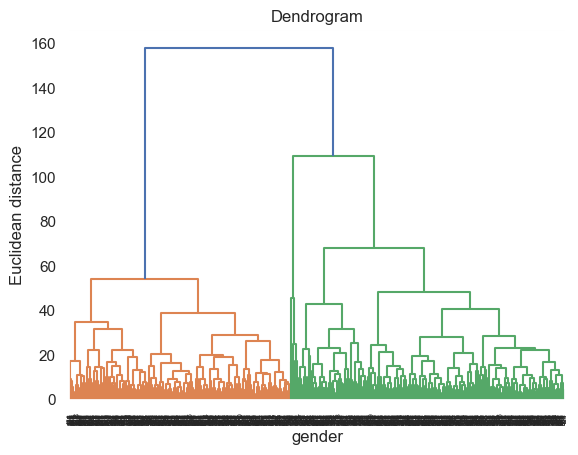

In [44]:
# import the library for hierarchical clustering
import scipy.cluster.hierarchy as sch

# Call the method dendrogram by using an object sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('gender')
plt.ylabel('Euclidean distance')
plt.show()

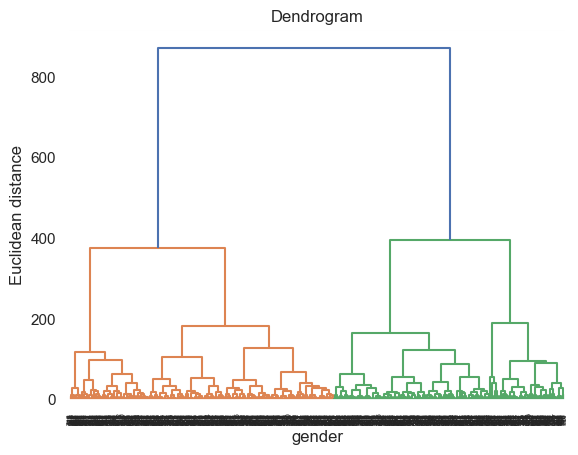

In [45]:
# import the library for hierarchical clustering
import scipy.cluster.hierarchy as sch

# Call the method dendrogram by using an object sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('gender')
plt.ylabel('Euclidean distance')
plt.show()

In [46]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [47]:
# Generate clusters from K-Means
km = KMeans(3)
km_clusters = km.fit_predict(df) # I train the kmeans clustering 
# Generate clusters using Agglomerative Hierarchical Clustering
ac = AgglomerativeClustering(3, linkage='average') 
ac_clusters = ac.fit_predict(df) # train the agglomerative clustering

In [48]:
from sklearn.metrics import silhouette_score
import numpy as np

# this has the calculation of the silhouette score
db_param_options = [[20, 5], [25, 5], [30, 5], [25, 7], [35, 7], [40, 5]]

for ep, min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples=min_sample)
    db_clusters = db.fit_predict(df)
    
    # Exclude noise points (-1) from the calculation
    cluster_labels = db_clusters[db_clusters != -1]
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(df[db_clusters != -1], cluster_labels)
        print("Eps:", ep, "Min Samples:", min_sample)
        print("DBSCAN Clustering:", silhouette_avg)
    else:
        print("Eps:", ep, "Min Samples:", min_sample)
        print("DBSCAN Clustering: Only one cluster found, silhouette score cannot be computed.")


Eps: 20 Min Samples: 5
DBSCAN Clustering: Only one cluster found, silhouette score cannot be computed.
Eps: 25 Min Samples: 5
DBSCAN Clustering: Only one cluster found, silhouette score cannot be computed.
Eps: 30 Min Samples: 5
DBSCAN Clustering: Only one cluster found, silhouette score cannot be computed.
Eps: 25 Min Samples: 7
DBSCAN Clustering: Only one cluster found, silhouette score cannot be computed.
Eps: 35 Min Samples: 7
DBSCAN Clustering: Only one cluster found, silhouette score cannot be computed.
Eps: 40 Min Samples: 5
DBSCAN Clustering: Only one cluster found, silhouette score cannot be computed.


In [49]:
# Generate clusters using DBSCAN
db = DBSCAN(eps = 40, min_samples = 5)
db_clusters = db.fit_predict(df)

# Davies-Bouldin Index
### Comparison of Davies-Bouldin Index and Silhouette Score

In [50]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [51]:
# Function to perform hierarchical clustering and calculate metrics
def perform_clustering(n_clusters, data):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clustering.fit_predict(data)
    db_index = davies_bouldin_score(data, labels)
    silhouette_avg = silhouette_score(data, labels)
    return db_index, silhouette_avg

In [52]:
# I used this to convert from string the feature column of this dataset
df.columns = df.columns.astype(str)

# Vary the number of clusters and store metrics
cluster_range = range(2, 11)
db_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    db_index, silhouette_avg = perform_clustering(n_clusters, df)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

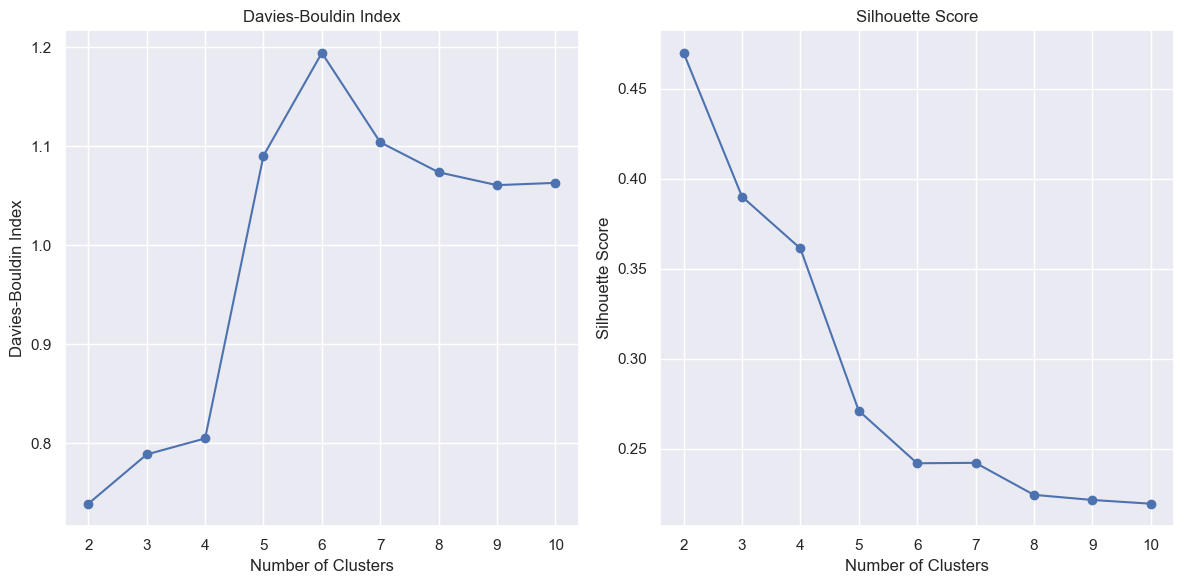

In [53]:
# Plot the Elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

# Plot the Silhouette method
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [54]:
# Choose the optimal number of clusters based on the metrics
optimal_clusters_db = np.argmin(db_scores) + 2  # +2 because the range starts from 2
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2  # +2 because the range starts from 2

print(f'Optimal Clusters (Davies-Bouldin): {optimal_clusters_db}')
print(f'Optimal Clusters (Silhouette): {optimal_clusters_silhouette}')

Optimal Clusters (Davies-Bouldin): 2
Optimal Clusters (Silhouette): 2


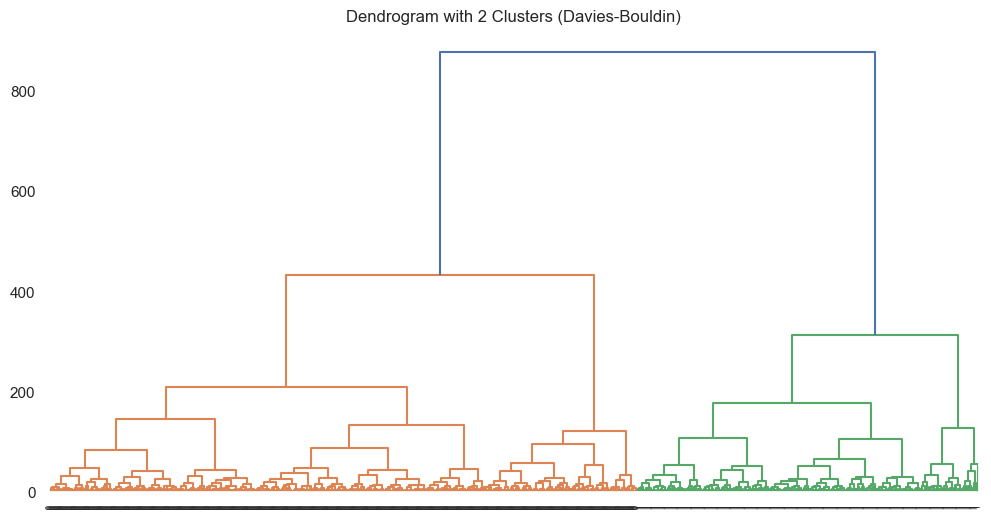

In [55]:
# Plot the dendrogram with the optimal number of clusters
optimal_agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters_db)
optimal_labels = optimal_agg_clustering.fit_predict(df)
linkage_matrix_optimal = linkage(df, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix_optimal, orientation="top", labels=optimal_labels, distance_sort='descending')
plt.title(f'Dendrogram with {optimal_clusters_db} Clusters (Davies-Bouldin)')
plt.show()

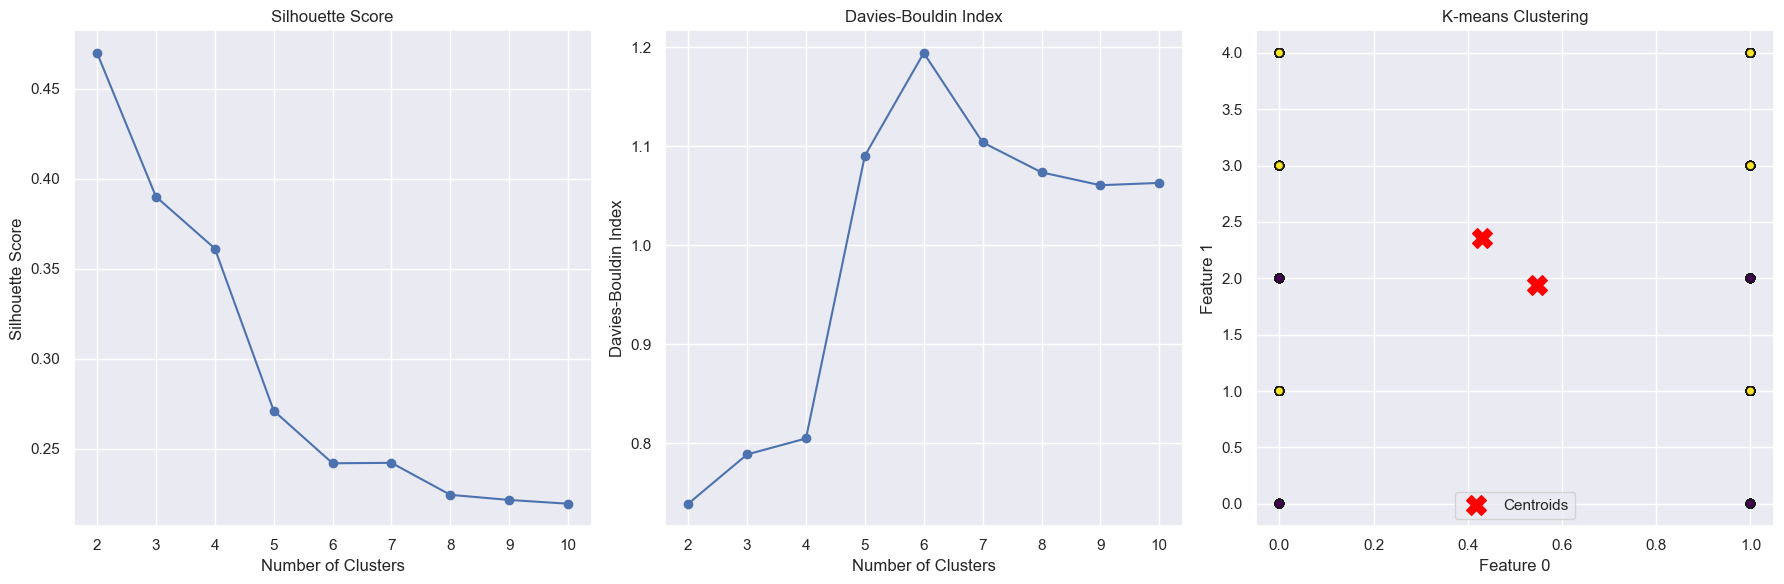

In [56]:

# Vary the number of clusters and store metrics
cluster_range = range(2, 11)
db_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    db_index, silhouette_avg = perform_clustering(n_clusters, df)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow method, Davies-Bouldin Index, and Silhouette Score
plt.figure(figsize=(18, 6))

# Elbow method
plt.subplot(1, 3, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Davies-Bouldin Index
plt.subplot(1, 3, 2)
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

# Optimal number of clusters based on Silhouette Score
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2  # +2 because the range starts from 2

# K-means clustering with the optimal number of clusters
optimal_kmeans = KMeans(n_clusters=optimal_clusters_silhouette, random_state=42)
optimal_labels = optimal_kmeans.fit_predict(df)

# Scatter plot for two features (change indices based on your dataset)
feature1_index = 0
feature2_index = 1

plt.subplot(1, 3, 3)
plt.scatter(df.iloc[:, feature1_index], df.iloc[:, feature2_index], c=optimal_labels, cmap='viridis', edgecolors='k')
plt.scatter(optimal_kmeans.cluster_centers_[:, feature1_index], optimal_kmeans.cluster_centers_[:, feature2_index],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel(f'Feature {feature1_index}')
plt.ylabel(f'Feature {feature2_index}')
plt.legend()

plt.tight_layout()
plt.show()


# Seasonal ARIMA

In [57]:
# I import this library because this is vital to excuted and it will serve as my guide for my step by step code of my data analysis of this dataset. 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [58]:
# I load this dataset to begin my analysis for the SARIMA time series analysis. 
hgv_df = pd.read_csv('HGV.csv')

# Display the records
hgv_df.head(12)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-01,29.100000,30.760000,28.680000,29.940001,29.940001,15228300
1,2017-03-01,30.090000,31.389999,27.920000,28.660000,28.660000,11210300
2,2017-04-01,28.950001,33.900002,28.690001,33.470001,33.470001,10596600
3,2017-05-01,33.500000,37.209999,32.955002,35.770000,35.770000,11783700
4,2017-06-01,35.950001,37.727001,33.959999,36.060001,36.060001,19040400
5,2017-07-01,36.000000,37.279999,34.919998,36.759998,36.759998,8485300
6,2017-08-01,36.950001,37.939999,32.200001,36.250000,36.250000,9308100
7,2017-09-01,36.450001,39.400002,34.869999,38.630001,38.630001,10572900
8,2017-10-01,38.750000,41.060001,38.730000,40.959999,40.959999,10800100
9,2017-11-01,41.130001,42.220001,38.560001,39.970001,39.970001,11209300


<Figure size 1200x500 with 0 Axes>

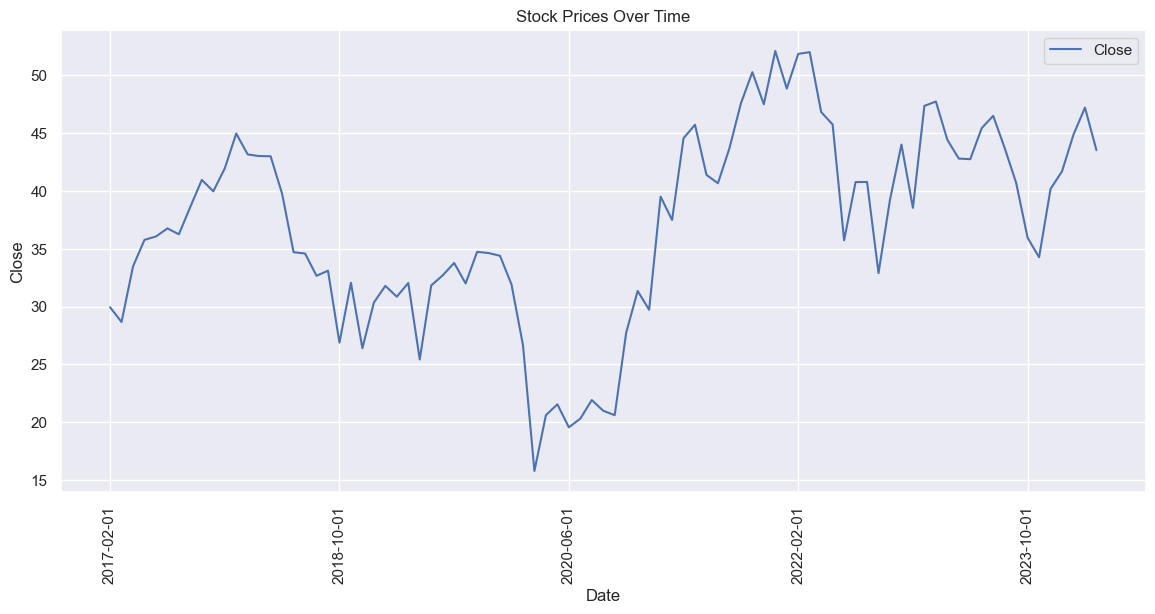

In [59]:
import matplotlib.pyplot as plt

# Assuming hgv_df is already loaded correctly
plt.figure(figsize=[12, 5])  # Set dimensions for figure
hgv_df.plot(x='Date', y='Close', figsize=(14, 6), color='b') 
plt.title('Stock Prices Over Time')
plt.ylabel('Close')  # Corrected ylabel to 'Close Price'
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

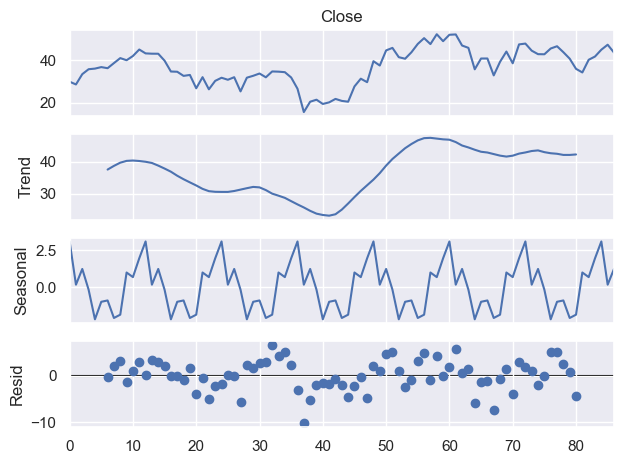

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt

# Ensure 'Date' column is not included in decomposition
numeric_cols = hgv_df.select_dtypes(include=['number']).columns

# Perform interpolation on numeric columns only
hgv_df[numeric_cols] = hgv_df[numeric_cols].interpolate()

# Decompose the data using seasonal_decompose() function
# Assuming the data has monthly frequency (period=12 for yearly data)
decomposition = seasonal_decompose(hgv_df['Close'], model='additive', period=12)

# Plot the decomposition
decomposition.plot()

# Show the plot
plt.show()

In [61]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller test (ADF Test)
ad_fuller_result = adfuller(hgv_df['Close'])

# Display the outcome of Augmented Dicky-Fuller Test
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.2179584258930385
p-value: 0.1997922650017136


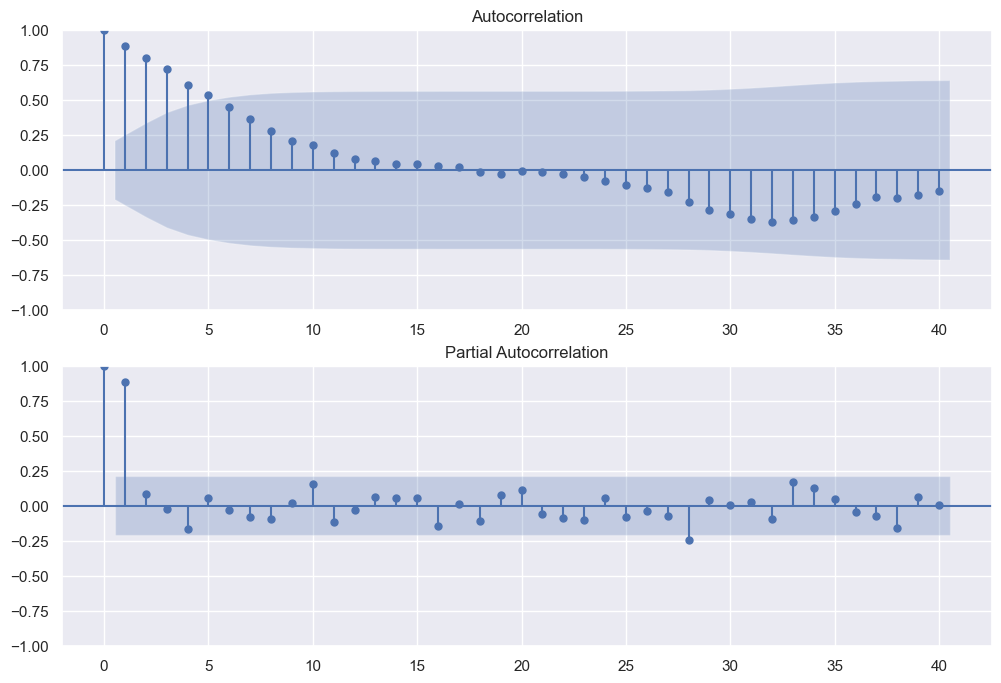

In [62]:
# Plot ACF and PACF
fig, ax = plt.subplots(2, figsize=(12, 8))
plot_acf(hgv_df['Close'], ax=ax[0], lags=40)
plot_pacf(hgv_df['Close'], ax=ax[1], lags=40)
plt.show()

In [63]:
hgv_df['Close'] = hgv_df['Close'] - hgv_df['Close'].shift(1)
# Shift index by desired number of periods with an optional time `freq`.

# Show first five records
hgv_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-01,29.100000,30.760000,28.680000,NaN,29.940001,15228300
1,2017-03-01,30.090000,31.389999,27.920000,-1.280001,28.660000,11210300
2,2017-04-01,28.950001,33.900002,28.690001,4.810001,33.470001,10596600
3,2017-05-01,33.500000,37.209999,32.955002,2.299999,35.770000,11783700
4,2017-06-01,35.950001,37.727001,33.959999,0.290001,36.060001,19040400


In [64]:
# Drop NA values
hgv_df.dropna(subset = ["Close"], inplace = True)

# Show first five records
hgv_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,2017-03-01,30.090000,31.389999,27.920000,-1.280001,28.660000,11210300
2,2017-04-01,28.950001,33.900002,28.690001,4.810001,33.470001,10596600
3,2017-05-01,33.500000,37.209999,32.955002,2.299999,35.770000,11783700
4,2017-06-01,35.950001,37.727001,33.959999,0.290001,36.060001,19040400
5,2017-07-01,36.000000,37.279999,34.919998,0.699997,36.759998,8485300


In [65]:
# Check for NaN values in the DataFrame
nan_check =hgv_df.isna().any().any()
print(nan_check)

False


In [66]:
# Augmented Dickey-Fuller test
ad_fuller_result = adfuller(hgv_df['Close'])

# Display the outcomes of Dicky Fuller test
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -10.85394911246604
p-value: 1.5041404066959516e-19


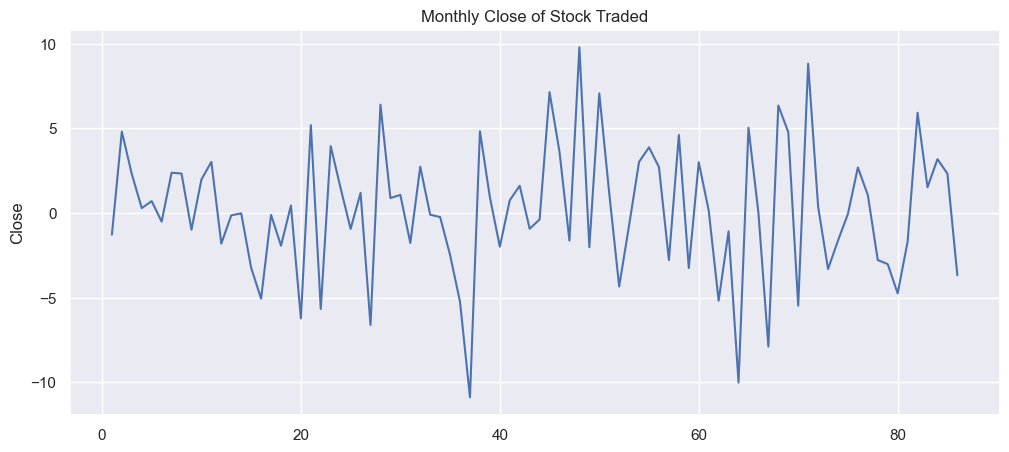

In [67]:
plt.figure(figsize = [12, 5]); # Set dimensions for figure
hgv_df['Close'].plot()
plt.title('Monthly Close of Stock Traded')
plt.ylabel('Close')
plt.grid(True)

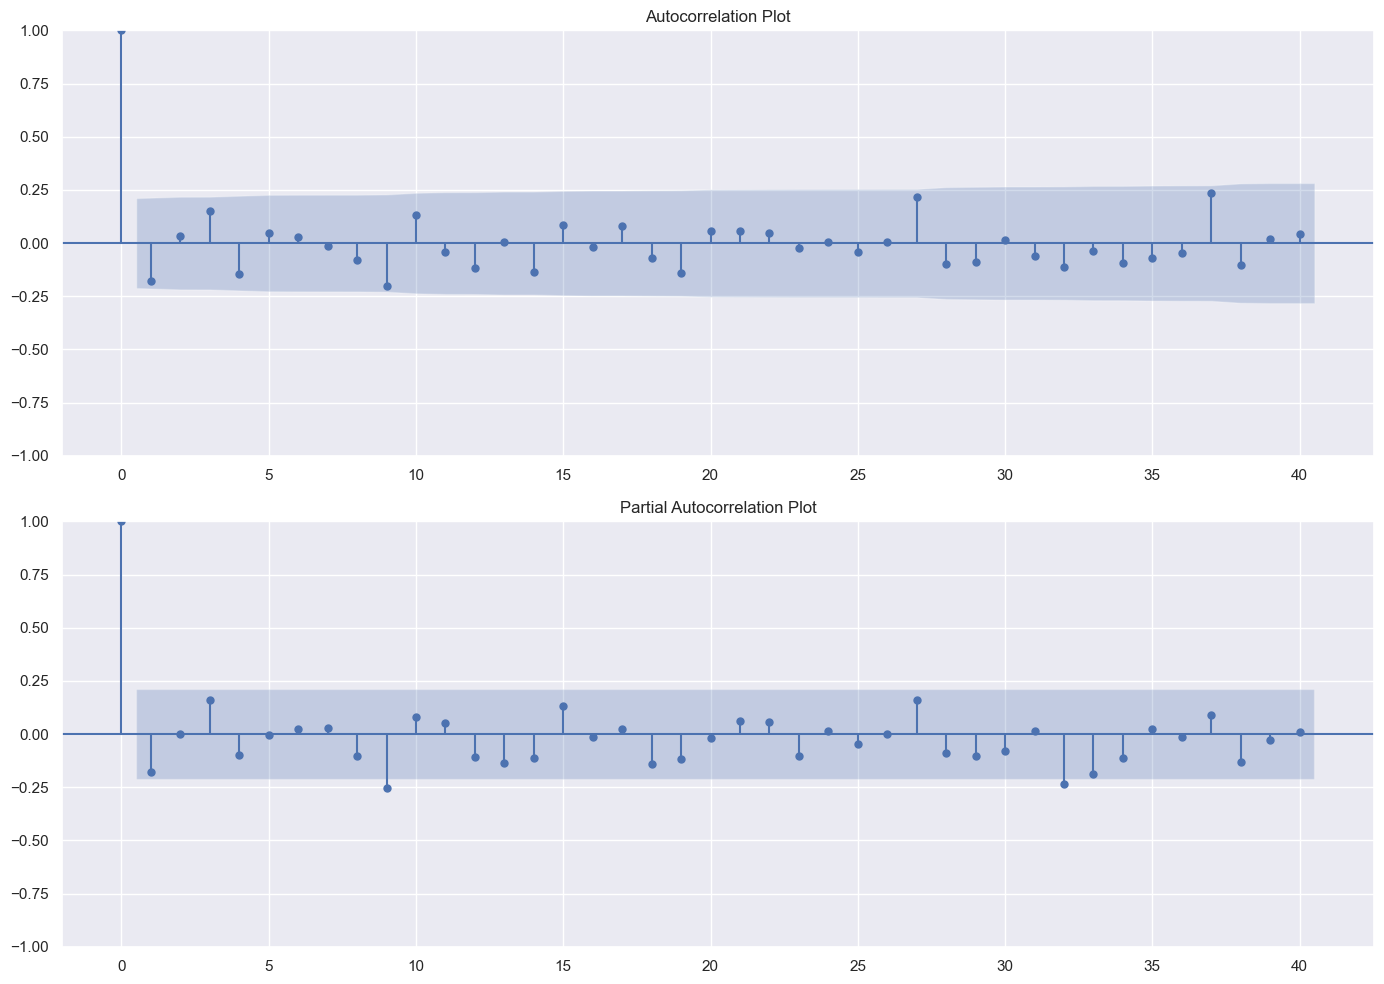

In [68]:
#This is the new Autocorrelation and Partial Autocorrelation after the 
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot autocorrelation
sm.graphics.tsa.plot_acf(hgv_df['Close'].dropna(), lags=40, ax=ax1)
ax1.set_title('Autocorrelation Plot')

# Plot partial autocorrelation
sm.graphics.tsa.plot_pacf(hgv_df['Close'].dropna(), lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

In [69]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(hgv_df['Close'], order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])                
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 549.3948904670121], [0, 1, 1, 483.5982634622022], [0, 1, 2, 483.4490210626072], [1, 1, 0, 515.7174706943465], [1, 1, 1, 483.22899739835697], [1, 1, 2, 485.2236194422173], [2, 1, 0, 496.4293949960881], [2, 1, 1, 485.21209904725225], [2, 1, 2, 486.12731177099295], [0, 2, 0, 640.0431019353271], [0, 2, 1, 550.3903653815926], [0, 2, 2, 491.6419531548114], [1, 2, 0, 587.0109482867226], [1, 2, 1, 518.0449608537077], [1, 2, 2, 491.80349107041116], [2, 2, 0, 544.4528206727238], [2, 2, 1, 499.77578750504887], [2, 2, 2, 493.71915759200164]]


In [70]:
# order = (2, 1, 2) means 
# First 2 for auto regressive model, 1 for difference, and second 2 for moving average
# seasonal_order = (2, 1, 2, 12) means
# 12 additional parameter means number of observations per year or the period
best_model = SARIMAX(hgv_df['Close'], order = (2, 1, 2), seasonal_order = (2, 1, 2, 12)).fit(dis = -1) # 12 is the seasonal value of the whole month of the year 

# Display the summary of the model
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                   86
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -218.189
Date:                            Sun, 21 Apr 2024   AIC                            454.377
Time:                                    23:46:22   BIC                            474.991
Sample:                                         0   HQIC                           462.592
                                             - 86                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8711      1.076     -0.809      0.418      -2.980       1.238
ar.L2         -0.1803      0.181   

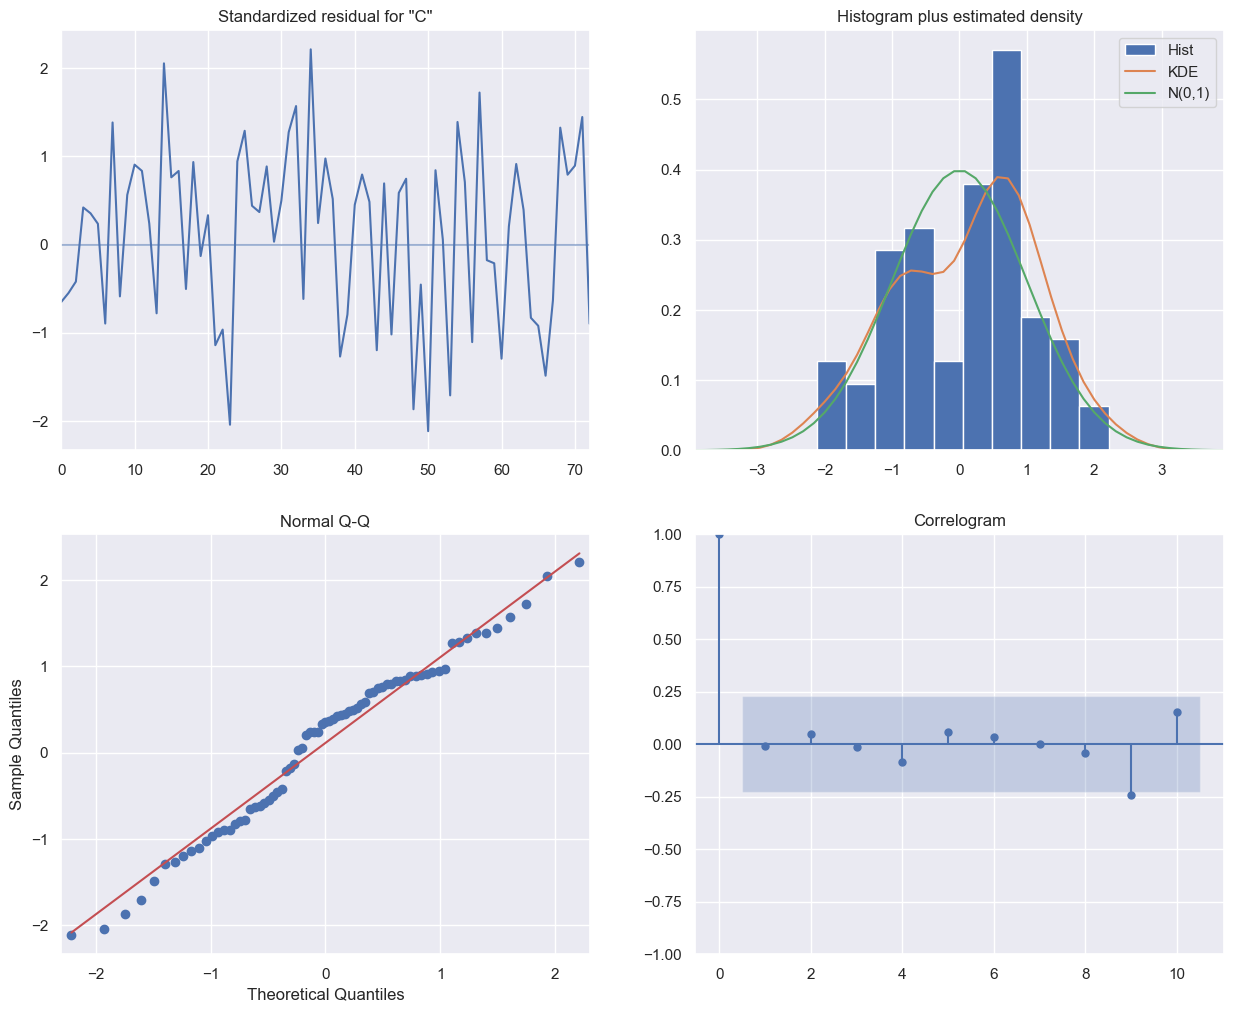

In [71]:
# Diagnosing the model residuals
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

In [72]:
forecast_values = [5] 

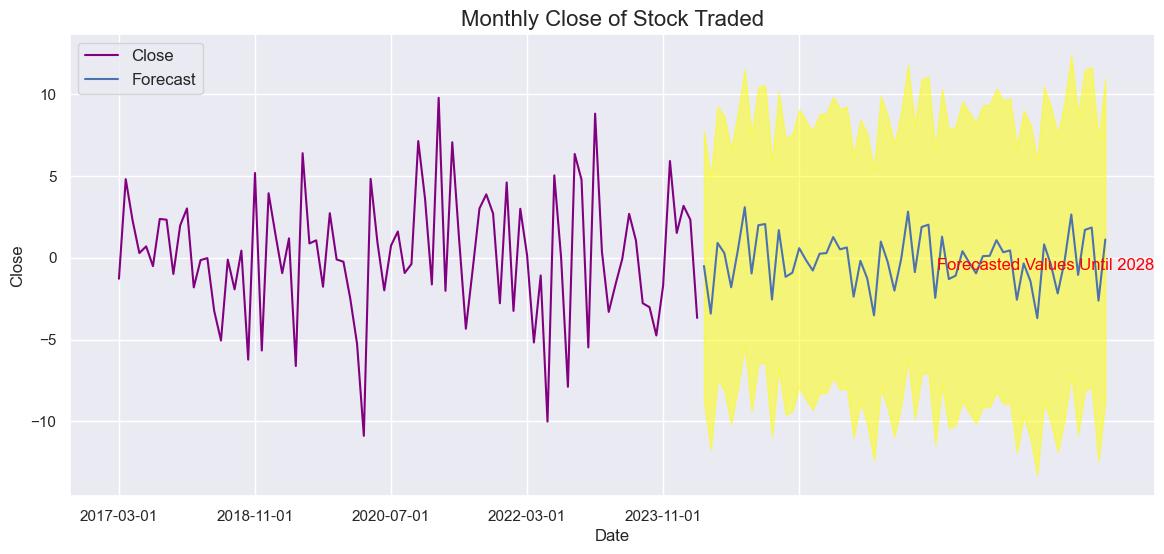

In [73]:
# Forecasting 3 years (36 steps) ahead
forecast_values = best_model.get_forecast(steps=60)

# Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

# Plot the data
ax = hgv_df.plot(x='Date', y='Close', figsize=(14, 6), legend=True, color='purple')

# Plot the forecasted values 
forecast_values.predicted_mean.plot(ax=ax, label='Forecast', figsize=(14, 6), grid=True)

# Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='yellow', alpha=0.5)

plt.title('Monthly Close of Stock Traded', size=16)
plt.ylabel('Close', size=12)
plt.legend(loc='upper left', prop={'size': 12})

# Annotate the forecasted period to the right side
plt.annotate('Forecasted Values Until 2028', xy=(1, 0.5), xycoords='axes fraction', fontsize=12, color='red', ha='right', va='center')

plt.show()

In [74]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train = hgv_df[:int(0.85 * (len(hgv_df)))]
test  = hgv_df[int(0.85 * (len(hgv_df))):]

train.shape, test.shape

((73, 7), (13, 7))

In [75]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,2017-03-01,30.090000,31.389999,27.920000,-1.280001,28.660000,11210300
2,2017-04-01,28.950001,33.900002,28.690001,4.810001,33.470001,10596600
3,2017-05-01,33.500000,37.209999,32.955002,2.299999,35.770000,11783700
4,2017-06-01,35.950001,37.727001,33.959999,0.290001,36.060001,19040400
5,2017-07-01,36.000000,37.279999,34.919998,0.699997,36.759998,8485300


In [76]:
start = len(train)
end   = len(train) + len(test) - 1

print(start, end)

73 85


In [77]:
start = len(train)
end   = len(train) + len(test) - 1
predictions = best_model.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

74    3.888043
75   -0.926750
76   -1.190752
77   -0.609139
78    0.749032
79    0.891118
80    1.556510
81    0.998166
82    0.307975
83   -1.832090
84   -0.601492
85   -3.773354
86    0.112185
Name: SARIMA Predictions, dtype: float64


In [78]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['Close'], predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test['Close'], predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['Close'], predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test['Adj Close'])
                                                               /np.abs(test['Close']))*100 
# Display the results
evaluation_results

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,-0.942725,3.924666,17.882737,4.228799,8447.07719
